# Read Clade Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# ! ls /content/drive/MyDrive/COVID__DataAnalysis

In [4]:
colab_path = "/content/drive/MyDrive/COVID__DataAnalysis"
local_path = ".."

path = local_path

In [5]:
clade_df = pd.read_csv(path + "/June_mutation_freq.csv")
clade_df.head()

,month,mutation,count,frequency
0,2020-04,M:A2V,8,0.015066
1,2020-04,N:D377G,15,0.028249
2,2020-04,N:E367K,1,0.001883
3,2020-04,N:G204R,57,0.107345
4,2020-04,N:M210I,2,0.003766


In [6]:
clade_df.shape

(2903, 4)

In [7]:
mutation_arr = set(list(clade_df['mutation']))
len(mutation_arr)

1711

In [8]:
clade_6month = pd.read_csv(path + "/June_mutation_freq_6months.csv")
clade_6month.head()

,mutation,number_month
0,N:G204R,14
1,N:R203K,14
2,ORF1b:P314L,14
3,S:D614G,14
4,ORF3a:Q57H,13


In [9]:
clade_6month_list = list(clade_6month['mutation'])
len(clade_6month_list)

53

In [10]:
clade_info = {}

for index, row in clade_df.iterrows():
#     mutation_name = row['mutation'].split(":")[0]
    mutation_name = row['mutation']
    if(mutation_name not in clade_6month_list):    # filter out all the short lived mutations
        continue     
    
    month = row['month']
    if(mutation_name not in clade_info):
        clade_info[mutation_name] = {}
    if(month not in clade_info[mutation_name]):
        clade_info[mutation_name][month] = 0
    clade_info[mutation_name][month] += row["frequency"]

In [11]:
# clade_info

In [12]:
month_arr = list(set(list(clade_df['month'])))
month_arr = sorted(month_arr)

In [13]:
mutation_freq_arr = {}

for mutation in clade_info:
    mutation_freq_arr[mutation] = np.zeros(len(month_arr))
    for i in range(len(month_arr)):
        month = month_arr[i]
        if(month in clade_info[mutation]):
            mutation_freq_arr[mutation][i] = clade_info[mutation][month]

In [14]:
# print(month_arr)
# mutation_freq_arr

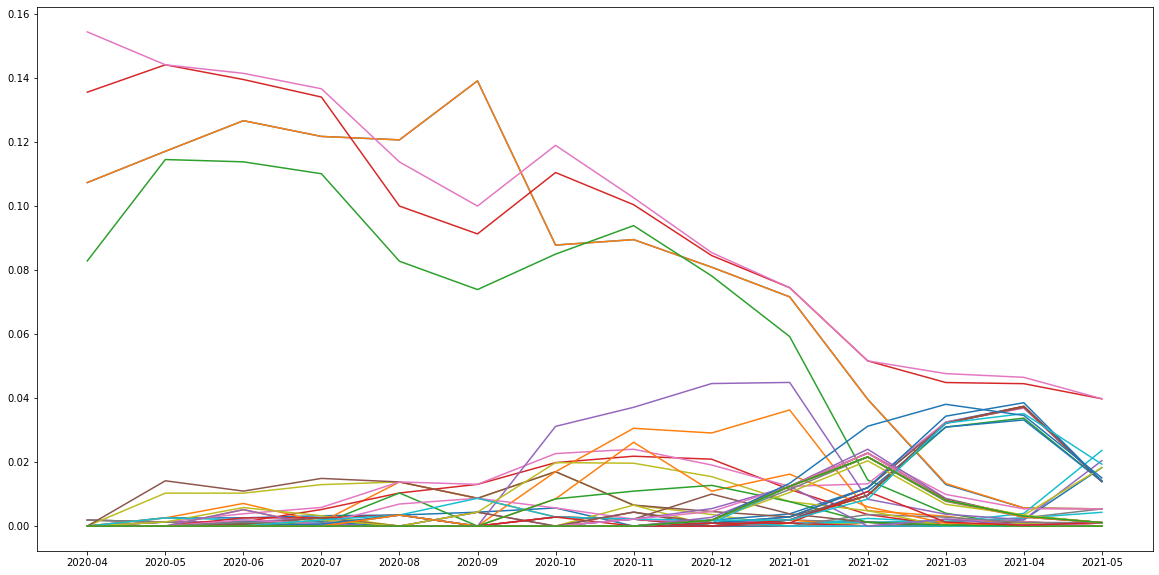

In [15]:
plt.rcParams["figure.figsize"] = (20,10)

# limit = 14
# plt.plot(month_arr[:limit], x, label="X")
# plt.plot(month_arr[:limit], y, label="Y")
# plt.legend(loc="upper right")

for mutation in mutation_freq_arr:
    plt.plot(month_arr, mutation_freq_arr[mutation], label=mutation)

# plt.legend(loc="upper right")
plt.show()

# Read  Old Data

In [16]:
symptom_df = pd.read_csv(path + "/symptom_frequency_monthWise - symptom_frequency_monthWise.csv")
symptom_df

,Symptom Name,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
0,High fever,646,440,976,257,165,177,55,61,33,18,5
1,Difficulty in breathing,4412,1745,5317,1055,490,405,195,234,175,103,14
2,Muscle pain,6139,3884,11889,2370,1292,1031,435,505,264,165,19
3,Dry cough,11219,5131,16114,3066,1807,1699,678,836,498,277,47
4,Not getting smell,1880,1943,7771,1763,1031,688,402,455,301,139,22
5,Feeling testless,3126,2829,8891,2029,1115,860,400,439,287,141,21
6,Fever,3563,3684,8302,2154,1260,1146,413,522,264,139,23
7,Sore throat,7051,3488,11351,2215,1058,889,412,427,273,148,19
8,Weakness,7950,910,2363,683,374,307,154,117,93,38,8
9,Itching eyes or turning red,5709,2295,9253,1372,632,433,225,272,155,89,18


In [17]:
symptom_freq_arr = {}

for index, row in symptom_df.iterrows():
    symptom_name = row['Symptom Name']
    symptom_freq_arr[symptom_name] = np.zeros(len(month_arr))
    for i in range(len(month_arr)):
        month = month_arr[i]
        if(month in row):
            symptom_freq_arr[symptom_name][i] = row[month]

In [18]:
symptom_freq_arr

{'High fever': array([646., 440., 976., 257., 165., 177.,  55.,  61.,  33.,  18.,   5.,
          0.,   0.,   0.]),
 'Difficulty in breathing': array([4412., 1745., 5317., 1055.,  490.,  405.,  195.,  234.,  175.,
         103.,   14.,    0.,    0.,    0.]),
 'Muscle pain': array([ 6139.,  3884., 11889.,  2370.,  1292.,  1031.,   435.,   505.,
          264.,   165.,    19.,     0.,     0.,     0.]),
 'Dry cough': array([11219.,  5131., 16114.,  3066.,  1807.,  1699.,   678.,   836.,
          498.,   277.,    47.,     0.,     0.,     0.]),
 'Not getting smell': array([1880., 1943., 7771., 1763., 1031.,  688.,  402.,  455.,  301.,
         139.,   22.,    0.,    0.,    0.]),
 'Feeling testless': array([3126., 2829., 8891., 2029., 1115.,  860.,  400.,  439.,  287.,
         141.,   21.,    0.,    0.,    0.]),
 'Fever': array([3563., 3684., 8302., 2154., 1260., 1146.,  413.,  522.,  264.,
         139.,   23.,    0.,    0.,    0.]),
 'Sore throat': array([ 7051.,  3488., 11351.,  2215., 

# Read new data (No data for march)

In [19]:
import json

with open(path + "/Api/new_data.json", "r") as f:
    data = json.load(f)

In [20]:
# data

In [21]:
# month_total_cases = {}
# for symptom in data:
#     for month in data[symptom]:
#         if(month not in month_total_cases):
#             month_total_cases[month] = 0
#         month_total_cases[month] += data[symptom][month]['BD']
# month_total_cases

with open(path + "/Api/month_total.json", 'r') as f:
    month_total_cases = json.load(f)
month_total_cases

{'2020-03': 52133,
 '2020-04': 111653,
 '2020-05': 65371,
 '2020-06': 236990,
 '2020-07': 51092,
 '2020-08': 32353,
 '2020-09': 24388,
 '2020-10': 10884,
 '2020-11': 11734,
 '2020-12': 8264,
 '2021-01': 5616,
 '2021-02': 1105,
 '2021-04': 28987,
 '2021-05': 8681,
 '2021-06': 672}

In [22]:
symptom_freq_arr = {}

for symptom in data:
    arr = []
    for month in data[symptom]:
#         arr.append(data[symptom][month]['BD'])            # consider total counts
        arr.append(data[symptom][month]['BD']/month_total_cases[month]) # consider percentage
    
    symptom_freq_arr[symptom] = np.array(arr)
    
# symptom_freq_arr

# Load Mutation and Clade information

In [24]:
path

'..'

In [26]:
import json
with open(path + "/Api/mutation_to_clade.json", "r") as f:
    mutation_to_clade = json.load(f)
# mutation_to_clade

In [28]:
import json
with open(path + "/Api/clade_to_mutation.json", "r") as f:
    clade_to_mutation = json.load(f)
# clade_to_mutation

# Misc

In [29]:
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [30]:
def applyMinMaxNorm(arr):
    arr = np.array(arr)
    ret = np.zeros(len(arr))
    
    mx = arr.max()
    mn = arr.min()

    for i in range(len(arr)):
        ret[i] = (arr[i] - mn)/(mx - mn)
    
    return ret

In [31]:
# symptom = 'High fever'
# mutation1 = 'ORF1b'
# mutation2 = 'ORF3a'

# limit = 14

# x1 = applyMinMaxNorm(mutation_freq_arr[mutation1][:limit])
# x2 = applyMinMaxNorm(mutation_freq_arr[mutation2][:limit])
# y = applyMinMaxNorm(symptom_freq_arr[symptom][:limit])

In [32]:
# y

In [33]:
# plt.rcParams["figure.figsize"] = (20,10)
# plt.plot(month_arr[:limit], x1, label="X1", color="blue")
# plt.plot(month_arr[:limit], x2, label="X2", color="blue")
# plt.plot(month_arr[:limit], y, label="Y", color="red")
# plt.legend(loc="upper right")

# Multiple Regression

In [34]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [35]:
def getFeatureVector(feature_arr):
    ln = len(feature_arr[0])
    ret = []
    for i in range(ln):
        ret.append([])
        
    for arr in feature_arr:
        for i in range(len(arr)):
            ret[i].append(arr[i])
    return np.array(ret)

In [36]:
# print(getFeatureVector([x1,x2]).shape)
# getFeatureVector([x1,x2])

In [37]:
# regr = linear_model.LinearRegression()
# X = getFeatureVector([x1,x2])
# print(X.shape)
# regr.fit(X, y)

In [38]:
# print(regr.coef_)
# print(regr.intercept_)
# print(regr.score(X,y))

In [39]:
# print(regr.coef_[0])

In [40]:
# y_pred = regr.predict(X)
# mean_squared_error(y_pred, y)

In [41]:
def getXY(mutation_arr, symptom, limit = -1):
    y = applyMinMaxNorm(symptom_freq_arr[symptom])
    xrr = []
    for mutation in mutation_arr:
        x = applyMinMaxNorm(mutation_freq_arr[mutation])
        xrr.append(x)
        
    if(limit != -1):
        y = y[:limit]
        for i in range(len(xrr)):
            xrr[i] = xrr[i][:limit]
    return xrr, y

In [70]:
image_folder_path = path + "/Figures/OneSymptom__ManyMutation__Figures/"

def plotFormattedData(mutation_arr, symptom, limit = -1, savefig = False):
    xrr, y = getXY(mutation_arr, symptom, limit)
    month_arr = list(set(list(clade_df['month'])))
    month_arr = sorted(month_arr)
    if(limit!=-1):
        month_arr = month_arr[:limit]
    
    for i in range(len(mutation_arr)):
        mutation = mutation_arr[i]
        x = xrr[i]
        plt.plot(month_arr, x, label="{}_{}".format(mutation, mutation_to_clade[mutation]))
    
    plt.plot(month_arr, y, label=symptom, linewidth=5)
    plt.legend(loc="upper right")
    if(savefig):
        plt.savefig(image_folder_path + symptom+".png")
#     return plt
    plt.show()

In [63]:
def performMultipleRegression(mutation_arr, symptom, limit = -1):
    
    xrr, y = getXY(mutation_arr, symptom, limit)
            
    X = getFeatureVector(xrr)
#     print(X.shape, y.shape)
    regr = linear_model.LinearRegression()
    regr.fit(X,y)
    
    coef = regr.coef_
    r_squared = regr.score(X, y)
    y_pred = regr.predict(X)
    mse = mean_squared_error(y_pred, y)
    
    weights = {}
    for i in range(len(mutation_arr)):
        weights[mutation_arr[i]] = coef[i]
        
    return {
        "weights"  : weights,
        "r_squared": r_squared,
        "mse"      : mse,
        "mutations": mutation_arr
    }

In [64]:
##########################################################################################

In [65]:
for symp in symptom_freq_arr:
    print(symp)

Feeling pain and pressure in chest
Not getting smell
Dry cough
Diabetes
Kidney problem
Fever
Sore throat
Difficulty in breathing
High blood pressure
High fever
Weakness
Itching eyes or turning red
Sleepiness
Respiratory illness
Feeling testless
Muscle pain
Abdominal pain, nausea or thin closet
Cancer
Heart diseases


In [111]:
symptom = "Dry cough"
limit = -1

In [112]:
##########################################################################################

# Filter Positive Slopes

In [113]:
mutation_arr = []
has_positive_slopes = []
for mutation in mutation_freq_arr:
    mutation_arr.append(mutation)
    reg_vals = performMultipleRegression([mutation], symptom, limit)
    weight = -1
    r_sq = reg_vals["r_squared"]
#     print(reg_vals)
    for key in reg_vals['weights']:
        weight = reg_vals['weights'][key]
    if(weight > 0 and  r_sq > .3):
        has_positive_slopes.append(mutation)
        print(mutation, mutation_to_clade[mutation], weight, r_sq , " >>>> ", weight > 0 and  r_sq > .4)
#     break

print(has_positive_slopes)
len(has_positive_slopes)

ORF1b:R2257S ['20B', '20A'] 0.7421368481764931 0.7698684416500167  >>>>  True
S:Q677H ['20B', '20A'] 0.590427849106721 0.3556697291680535  >>>>  False
ORF1a:S610L ['20B'] 0.5778161958582003 0.4573588680559926  >>>>  True
ORF8:E64* ['20B'] 0.8792377254384969 0.5705465257294785  >>>>  True
ORF1a:R24C ['20B', '20A'] 0.6430227210292855 0.36103525858868224  >>>>  False
ORF1a:K1230N ['20B'] 0.5229521732049595 0.3608535389085027  >>>>  False
['ORF1b:R2257S', 'S:Q677H', 'ORF1a:S610L', 'ORF8:E64*', 'ORF1a:R24C', 'ORF1a:K1230N']


6

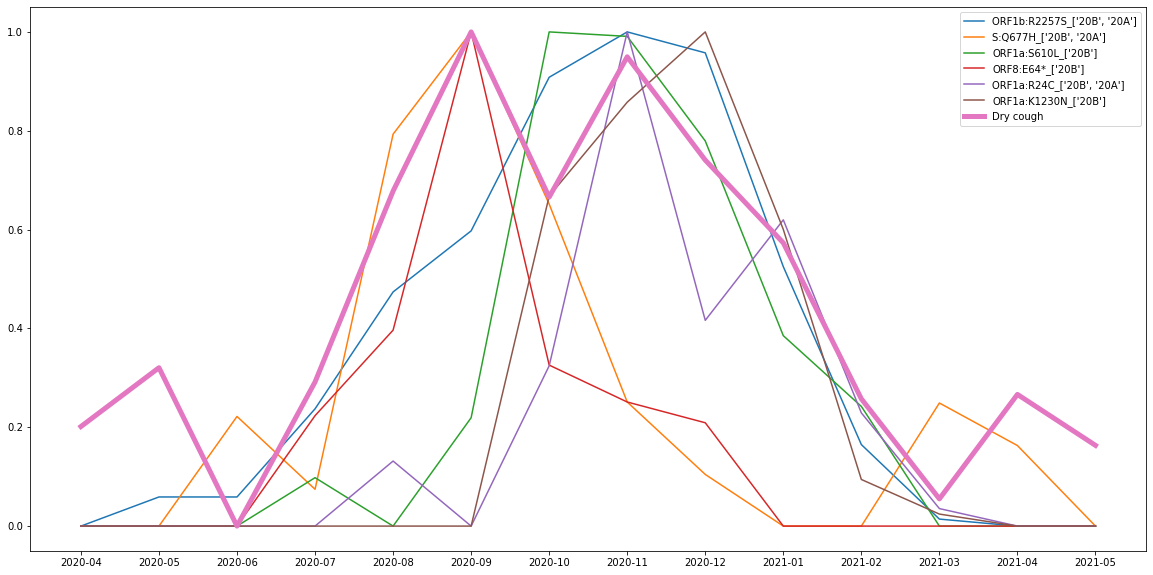

In [114]:
plotFormattedData(has_positive_slopes, symptom, limit, savefig = True)

In [54]:
performMultipleRegression(has_positive_slopes, symptom)

{'weights': {'ORF1b:R2257S': 0.9512516511765001,
  'ORF1a:E57K': -0.5188982703024024,
  'S:P681R': 0.2715366722157732,
  'ORF1a:S610L': -0.28542954405760235,
  'ORF1a:R24C': 0.5031360513041881,
  'ORF1a:K1230N': -0.224696891154924},
 'r_squared': 0.8633117995574929,
 'mse': 0.009596886636515953,
 'mutations': ['ORF1b:R2257S',
  'ORF1a:E57K',
  'S:P681R',
  'ORF1a:S610L',
  'ORF1a:R24C',
  'ORF1a:K1230N']}

# Check all combinations

In [45]:
import itertools
from operator import itemgetter

In [46]:
all_combinations = []
combination_limit = 3
for i in range(1, min(combination_limit, len(has_positive_slopes))+1):
    current_combinations = itertools.combinations(has_positive_slopes, i)
    for comb in current_combinations:
        print(list(comb))
        all_combinations.append(list(comb))
all_combinations

['N:G204R']
['N:R203K']
['ORF1a:I300F']
['N:S194L']
['ORF1b:R2257S']
['S:Q677H']
['ORF8:E64*']
['N:G204R', 'N:R203K']
['N:G204R', 'ORF1a:I300F']
['N:G204R', 'N:S194L']
['N:G204R', 'ORF1b:R2257S']
['N:G204R', 'S:Q677H']
['N:G204R', 'ORF8:E64*']
['N:R203K', 'ORF1a:I300F']
['N:R203K', 'N:S194L']
['N:R203K', 'ORF1b:R2257S']
['N:R203K', 'S:Q677H']
['N:R203K', 'ORF8:E64*']
['ORF1a:I300F', 'N:S194L']
['ORF1a:I300F', 'ORF1b:R2257S']
['ORF1a:I300F', 'S:Q677H']
['ORF1a:I300F', 'ORF8:E64*']
['N:S194L', 'ORF1b:R2257S']
['N:S194L', 'S:Q677H']
['N:S194L', 'ORF8:E64*']
['ORF1b:R2257S', 'S:Q677H']
['ORF1b:R2257S', 'ORF8:E64*']
['S:Q677H', 'ORF8:E64*']
['N:G204R', 'N:R203K', 'ORF1a:I300F']
['N:G204R', 'N:R203K', 'N:S194L']
['N:G204R', 'N:R203K', 'ORF1b:R2257S']
['N:G204R', 'N:R203K', 'S:Q677H']
['N:G204R', 'N:R203K', 'ORF8:E64*']
['N:G204R', 'ORF1a:I300F', 'N:S194L']
['N:G204R', 'ORF1a:I300F', 'ORF1b:R2257S']
['N:G204R', 'ORF1a:I300F', 'S:Q677H']
['N:G204R', 'ORF1a:I300F', 'ORF8:E64*']
['N:G204R', 'N:S

[['N:G204R'],
 ['N:R203K'],
 ['ORF1a:I300F'],
 ['N:S194L'],
 ['ORF1b:R2257S'],
 ['S:Q677H'],
 ['ORF8:E64*'],
 ['N:G204R', 'N:R203K'],
 ['N:G204R', 'ORF1a:I300F'],
 ['N:G204R', 'N:S194L'],
 ['N:G204R', 'ORF1b:R2257S'],
 ['N:G204R', 'S:Q677H'],
 ['N:G204R', 'ORF8:E64*'],
 ['N:R203K', 'ORF1a:I300F'],
 ['N:R203K', 'N:S194L'],
 ['N:R203K', 'ORF1b:R2257S'],
 ['N:R203K', 'S:Q677H'],
 ['N:R203K', 'ORF8:E64*'],
 ['ORF1a:I300F', 'N:S194L'],
 ['ORF1a:I300F', 'ORF1b:R2257S'],
 ['ORF1a:I300F', 'S:Q677H'],
 ['ORF1a:I300F', 'ORF8:E64*'],
 ['N:S194L', 'ORF1b:R2257S'],
 ['N:S194L', 'S:Q677H'],
 ['N:S194L', 'ORF8:E64*'],
 ['ORF1b:R2257S', 'S:Q677H'],
 ['ORF1b:R2257S', 'ORF8:E64*'],
 ['S:Q677H', 'ORF8:E64*'],
 ['N:G204R', 'N:R203K', 'ORF1a:I300F'],
 ['N:G204R', 'N:R203K', 'N:S194L'],
 ['N:G204R', 'N:R203K', 'ORF1b:R2257S'],
 ['N:G204R', 'N:R203K', 'S:Q677H'],
 ['N:G204R', 'N:R203K', 'ORF8:E64*'],
 ['N:G204R', 'ORF1a:I300F', 'N:S194L'],
 ['N:G204R', 'ORF1a:I300F', 'ORF1b:R2257S'],
 ['N:G204R', 'ORF1a:I300

In [47]:
from tqdm import tqdm
track = []

for i in tqdm(range(len(all_combinations))):
    comb = all_combinations[i]
    reg_val = performMultipleRegression(comb, symptom, limit)
#     print(reg_val)
    track.append(reg_val)

100%|██████████| 63/63 [00:00<00:00, 1120.89it/s]


In [48]:
sorted(track, key=itemgetter('r_squared'), reverse=True)

[{'weights': {'N:G204R': 217.82422228743997,
   'N:R203K': -217.57354925914197,
   'S:Q677H': 0.42087960934353996},
  'r_squared': 0.7365982768274085,
  'mse': 0.021447312495640584,
  'mutations': ['N:G204R', 'N:R203K', 'S:Q677H']},
 {'weights': {'N:G204R': 183.15768978780818,
   'N:R203K': -182.9337551922942,
   'ORF8:E64*': 0.5152227959052228},
  'r_squared': 0.7344303643083694,
  'mse': 0.02162383335017037,
  'mutations': ['N:G204R', 'N:R203K', 'ORF8:E64*']},
 {'weights': {'N:G204R': 140.27375076264477,
   'N:R203K': -139.9191036555001,
   'ORF1b:R2257S': 0.3356267464085336},
  'r_squared': 0.7307214913394539,
  'mse': 0.02192582589833166,
  'mutations': ['N:G204R', 'N:R203K', 'ORF1b:R2257S']},
 {'weights': {'ORF1a:I300F': 0.30299404008378605,
   'ORF1b:R2257S': 0.20765858999367046,
   'ORF8:E64*': 0.47435570062405036},
  'r_squared': 0.7088175291200065,
  'mse': 0.023709341651208388,
  'mutations': ['ORF1a:I300F', 'ORF1b:R2257S', 'ORF8:E64*']},
 {'weights': {'N:G204R': 0.3504936239

In [49]:
sorted(track, key=itemgetter('mse'), reverse=False)

[{'weights': {'N:G204R': 217.82422228743997,
   'N:R203K': -217.57354925914197,
   'S:Q677H': 0.42087960934353996},
  'r_squared': 0.7365982768274085,
  'mse': 0.021447312495640584,
  'mutations': ['N:G204R', 'N:R203K', 'S:Q677H']},
 {'weights': {'N:G204R': 183.15768978780818,
   'N:R203K': -182.9337551922942,
   'ORF8:E64*': 0.5152227959052228},
  'r_squared': 0.7344303643083694,
  'mse': 0.02162383335017037,
  'mutations': ['N:G204R', 'N:R203K', 'ORF8:E64*']},
 {'weights': {'N:G204R': 140.27375076264477,
   'N:R203K': -139.9191036555001,
   'ORF1b:R2257S': 0.3356267464085336},
  'r_squared': 0.7307214913394539,
  'mse': 0.02192582589833166,
  'mutations': ['N:G204R', 'N:R203K', 'ORF1b:R2257S']},
 {'weights': {'ORF1a:I300F': 0.30299404008378605,
   'ORF1b:R2257S': 0.20765858999367046,
   'ORF8:E64*': 0.47435570062405036},
  'r_squared': 0.7088175291200065,
  'mse': 0.023709341651208388,
  'mutations': ['ORF1a:I300F', 'ORF1b:R2257S', 'ORF8:E64*']},
 {'weights': {'N:G204R': 0.3504936239

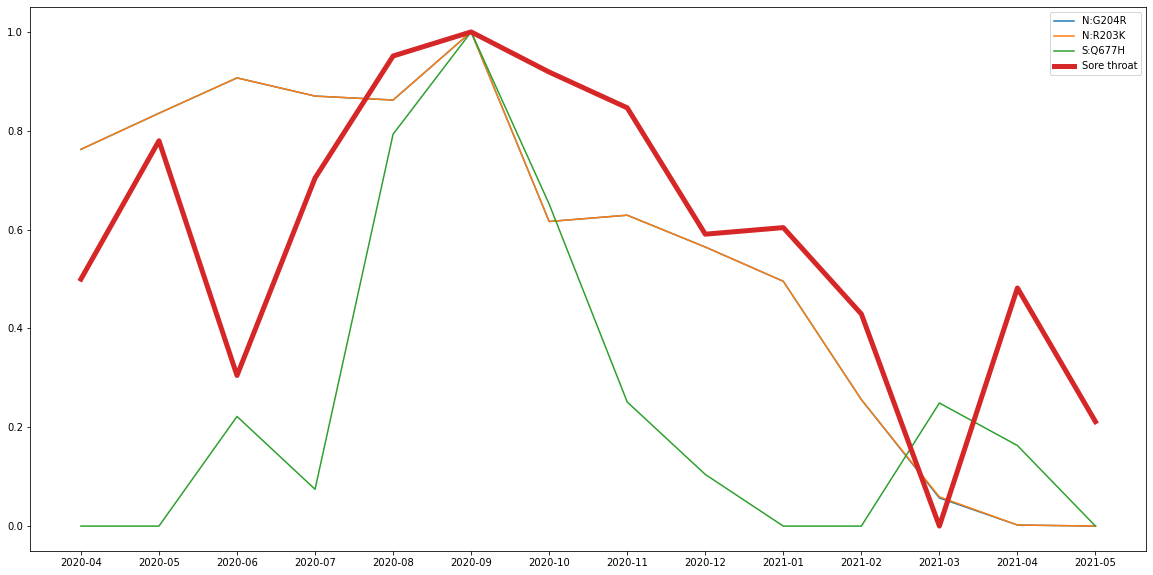

In [50]:
plotFormattedData(['N:G204R', 'N:R203K', 'S:Q677H'], symptom, limit)

In [51]:
# performMultipleRegression(['ORF1b'], 'High fever', limit=11)

In [52]:
# plotFormattedData(['ORF1b', 'ORF3a'], 'High fever', limit=-1)